In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math, copy
import seaborn as sns

In [68]:
df = pd.read_csv("../data/vehicle loand dataset.csv", header=0)

c:\Users\Asanka\.conda\envs\venv1\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [69]:
df

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Relative,...,Yes,No,Business Entity Type 2,NaN,0.173527,0.184116,0.0577,0.0,1.0,1
121852,12173765,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Alone,...,Yes,Yes,Self-employed,NaN,0.371559,0.406617,0.0825,4.0,0.0,0
121853,12103937,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Alone,...,No,No,Trade: type 6,0.169049,0.048079,NaN,NaN,0.0,NaN,0
121854,12170623,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Alone,...,Yes,Yes,Business Entity Type 3,0.182737,0.103538,0.077499,0.0979,0.0,2.0,0


In [70]:
df.shape

(121856, 40)

In [71]:
df.isnull().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [72]:
df1 = df.drop("ID", axis = 1)
df1 = df1.drop("Social_Circle_Default", axis = 1)
df1 = df1.drop("Own_House_Age", axis = 1)
df1 = df1.drop("Client_Occupation", axis = 1)
df1 = df1.drop("Mobile_Tag", axis = 1)



In [73]:
df1.isnull().sum()

Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Family_Members          2410
Cleint_City_Rating             2409
Application_Process_Day        2428
Application_Process_Hour       3663
Client_Permanent_Match_Tag  

In [74]:
df1.describe()

,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Phone_Change,Credit_Bureau,Default
count,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,121856.000000,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,53021.000000,116170.000000,118192.000000,103316.000000,121856.000000
mean,0.342854,0.332262,0.499175,0.692060,0.417779,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.501213,0.518625,962.106056,1.891082,0.080792
std,0.474665,0.471026,0.500001,0.461644,0.728802,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,827.976726,1.861921,0.272517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.014568,0.000005,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333481,0.390164,272.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.504657,0.564978,755.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.673890,0.664011,1570.000000,3.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,0.945741,100.000000,4185.000000,22.000000,1.000000


In [75]:
df1.dropna(axis='rows')

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,...,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
6,15750,1.0,1.0,0.0,1.0,0.0,128835,3779.55,Alone,Retired,...,14.0,Yes,Yes,XNA,0.729913,0.602545,0.511892,0.0,3.0,0
7,13500,0.0,0.0,1.0,1.0,0.0,60415.2,3097.8,Alone,Retired,...,15.0,Yes,Yes,XNA,0.711468,0.657508,0.549597,1687.0,4.0,0
10,27000,0.0,0.0,1.0,1.0,1.0,67500,3375,Alone,Govt Job,...,12.0,Yes,Yes,Government,0.715451,0.770343,0.722393,1799.0,1.0,0
11,15750,0.0,0.0,0.0,0.0,1.0,149963.85,4397.85,Alone,Service,...,8.0,Yes,Yes,Self-employed,0.435028,0.564752,0.67383,1333.0,3.0,0
64,11250,0.0,1.0,1.0,0.0,0.0,36000,2066.4,Alone,Service,...,19.0,Yes,Yes,Self-employed,0.453478,0.249441,0.75574,533.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121828,13950,0.0,0.0,1.0,0.0,0.0,77400,2515.5,Alone,Commercial,...,15.0,Yes,No,Business Entity Type 3,0.340557,0.486442,0.385915,4.0,0.0,0
121836,18000,0.0,0.0,1.0,1.0,0.0,75519,3212.55,Alone,Service,...,16.0,Yes,Yes,Transport: type 4,0.505079,0.590033,0.785052,1610.0,1.0,0
121837,27000,0.0,1.0,1.0,0.0,0.0,38152.8,1169.55,Partner,Commercial,...,3.0,Yes,Yes,Self-employed,0.598766,0.398873,0.358951,245.0,1.0,0
121838,31500,1.0,0.0,0.0,1.0,1.0,94230,2767.95,Alone,Govt Job,...,11.0,Yes,Yes,Military,0.306227,0.671083,0.450747,1796.0,5.0,0


In [76]:
df1 = df1.dropna()

In [77]:
df1.isnull().sum()

Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Mobile_Tag                    0
Homephone_Tag                 0
Workphone_Working             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Type_Organization             0
Score_Source_1                0
Score_So

In [91]:
df1.describe()

,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Phone_Change,Credit_Bureau,Default
count,18221.000000,18221.000000,18221.000000,18221.000000,18221.000000,18221.0,18221.000000,18221.000000,18221.000000,18221.000000,18221.000000,18221.000000,18221.000000,18221.000000,18221.000000,18221.000000,18221.000000
mean,0.377751,0.329400,0.493716,0.670106,0.518742,1.0,0.223643,0.293892,2.263597,2.036112,3.158444,12.227979,0.506104,0.538158,1062.307667,1.847100,0.073981
std,0.484838,0.470008,0.499974,0.470187,0.774060,0.0,0.416697,0.455555,0.962039,0.508880,1.766867,3.288814,0.210357,1.058084,839.021709,1.807534,0.261746
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.017177,0.000024,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.339694,0.418417,362.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.511980,0.575679,895.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,1.000000,3.000000,2.000000,5.000000,15.000000,0.677404,0.667657,1683.000000,3.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,12.000000,1.0,1.000000,1.000000,14.000000,3.000000,6.000000,23.000000,0.945741,100.000000,3949.000000,17.000000,1.000000


In [81]:
df1


,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,...,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
6,15750,1.0,1.0,0.0,1.0,0.0,128835,3779.55,Alone,Retired,...,14.0,Yes,Yes,XNA,0.729913,0.602545,0.511892,0.0,3.0,0
7,13500,0.0,0.0,1.0,1.0,0.0,60415.2,3097.8,Alone,Retired,...,15.0,Yes,Yes,XNA,0.711468,0.657508,0.549597,1687.0,4.0,0
10,27000,0.0,0.0,1.0,1.0,1.0,67500,3375,Alone,Govt Job,...,12.0,Yes,Yes,Government,0.715451,0.770343,0.722393,1799.0,1.0,0
11,15750,0.0,0.0,0.0,0.0,1.0,149963.85,4397.85,Alone,Service,...,8.0,Yes,Yes,Self-employed,0.435028,0.564752,0.67383,1333.0,3.0,0
64,11250,0.0,1.0,1.0,0.0,0.0,36000,2066.4,Alone,Service,...,19.0,Yes,Yes,Self-employed,0.453478,0.249441,0.75574,533.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121828,13950,0.0,0.0,1.0,0.0,0.0,77400,2515.5,Alone,Commercial,...,15.0,Yes,No,Business Entity Type 3,0.340557,0.486442,0.385915,4.0,0.0,0
121836,18000,0.0,0.0,1.0,1.0,0.0,75519,3212.55,Alone,Service,...,16.0,Yes,Yes,Transport: type 4,0.505079,0.590033,0.785052,1610.0,1.0,0
121837,27000,0.0,1.0,1.0,0.0,0.0,38152.8,1169.55,Partner,Commercial,...,3.0,Yes,Yes,Self-employed,0.598766,0.398873,0.358951,245.0,1.0,0
121838,31500,1.0,0.0,0.0,1.0,1.0,94230,2767.95,Alone,Govt Job,...,11.0,Yes,Yes,Military,0.306227,0.671083,0.450747,1796.0,5.0,0


In [95]:
df1.corr()

,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Phone_Change,Credit_Bureau,Default
Car_Owned,1.000000,-0.001990,-0.007528,0.003530,0.078021,-0.002808,-0.010401,0.115511,-0.029711,-0.008365,0.006499,-0.074496,0.009658,0.012778,-0.012061,-0.019985
Bike_Owned,-0.001990,1.000000,-0.001468,0.012424,-0.001884,0.001596,0.001041,-0.001227,0.000976,-0.002510,0.004498,-0.007841,0.003231,-0.006203,-0.013392,0.003555
Active_Loan,-0.007528,-0.001468,1.000000,-0.011504,0.019202,0.013200,0.002687,0.019362,0.011894,0.007247,0.000771,-0.003634,0.011404,0.024335,0.012480,0.006069
House_Own,0.003530,0.012424,-0.011504,1.000000,0.026263,-0.136614,-0.050073,0.035488,0.015385,0.013570,-0.101283,0.073175,0.006032,-0.025390,0.065736,-0.001027
Child_Count,0.078021,-0.001884,0.019202,0.026263,1.000000,0.020781,-0.041847,0.896115,0.025034,0.007962,-0.038804,-0.141376,-0.008329,0.000398,-0.032472,0.021329
Homephone_Tag,-0.002808,0.001596,0.013200,-0.136614,0.020781,1.000000,0.324515,0.035028,0.009795,-0.019207,0.039608,-0.071243,0.000969,0.046770,-0.074686,0.007311
Workphone_Working,-0.010401,0.001041,0.002687,-0.050073,-0.041847,0.324515,1.000000,-0.028874,-0.081296,-0.009714,0.053637,0.077212,0.013317,0.069376,-0.028742,-0.016647
Client_Family_Members,0.115511,-0.001227,0.019362,0.035488,0.896115,0.035028,-0.028874,1.000000,0.032574,0.009945,-0.046177,-0.100206,-0.008202,0.020496,-0.013970,0.010390
Cleint_City_Rating,-0.029711,0.000976,0.011894,0.015385,0.025034,0.009795,-0.081296,0.032574,1.000000,-0.007341,-0.255828,-0.106899,-0.052634,-0.021770,0.026947,0.058644
Application_Process_Day,-0.008365,-0.002510,0.007247,0.013570,0.007962,-0.019207,-0.009714,0.009945,-0.007341,1.000000,-0.024049,-0.001593,-0.002562,0.000693,-0.002175,0.009781


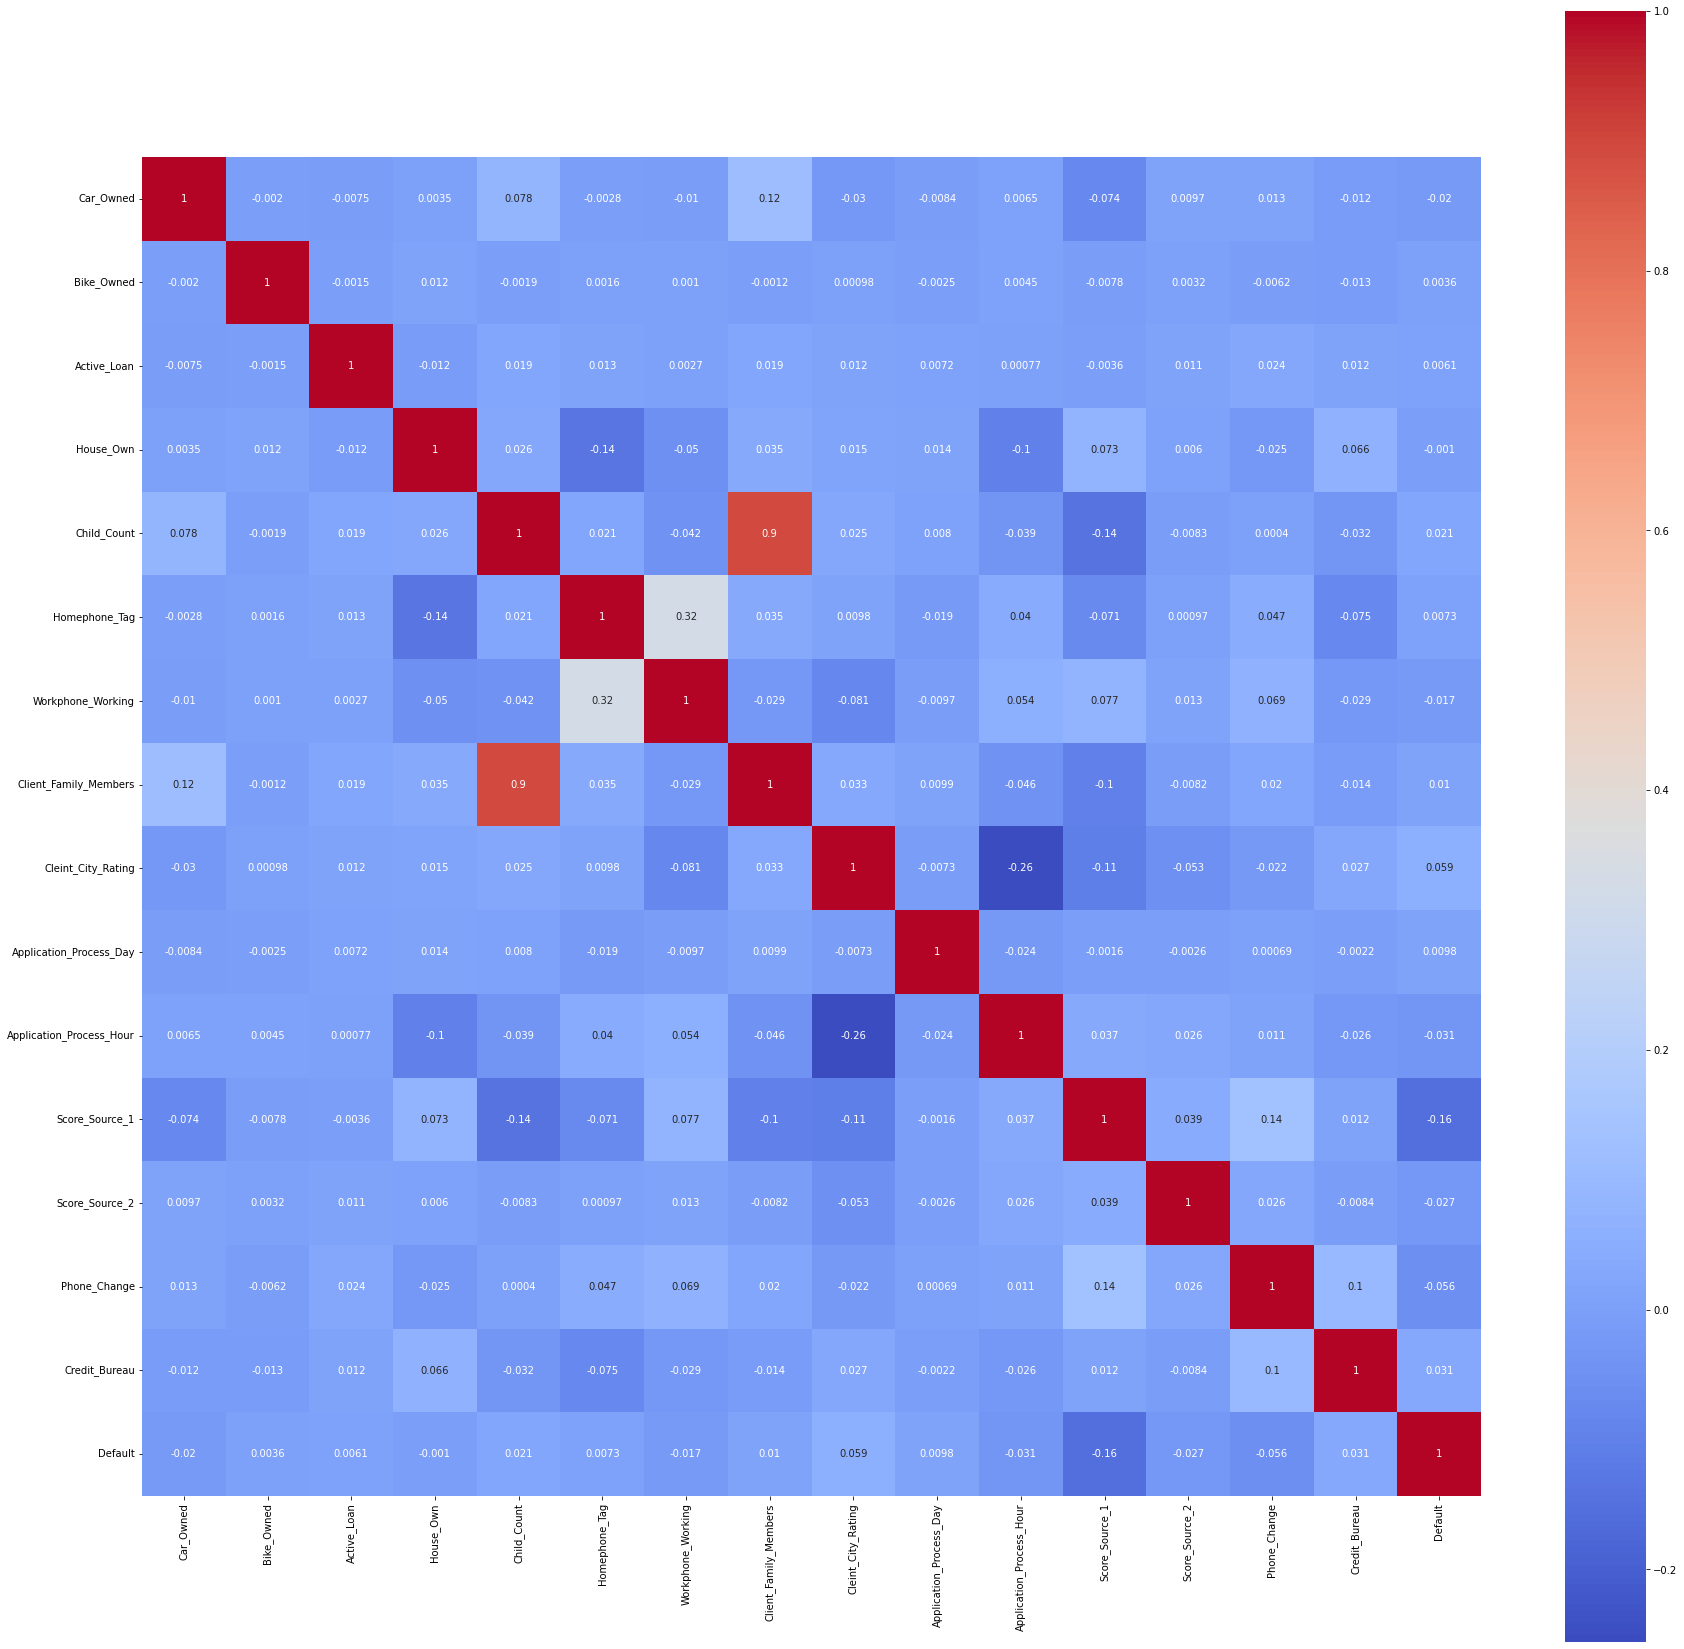

In [125]:
plt.figure(figsize=(30,30))
sns.heatmap(df1.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [107]:
cols = df1.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['Client_Income_Type',
 'Client_Income',
 'Registration_Days',
 'Loan_Annuity',
 'Type_Organization',
 'Accompany_Client',
 'Client_Permanent_Match_Tag',
 'Credit_Amount',
 'Loan_Contract_Type',
 'Client_Gender',
 'Employed_Days',
 'ID_Days',
 'Score_Source_3',
 'Client_Housing_Type',
 'Client_Marital_Status',
 'Client_Education',
 'Client_Contact_Work_Tag',
 'Population_Region_Relative',
 'Age_Days']

c:\Users\Asanka\.conda\envs\venv1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


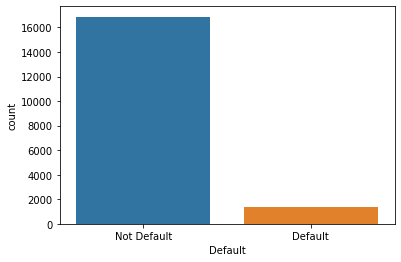

In [99]:
pred_var = sns.countplot(df1['Default'])
pred_var.set_xticklabels(['Not Default','Default'])
plt.show()

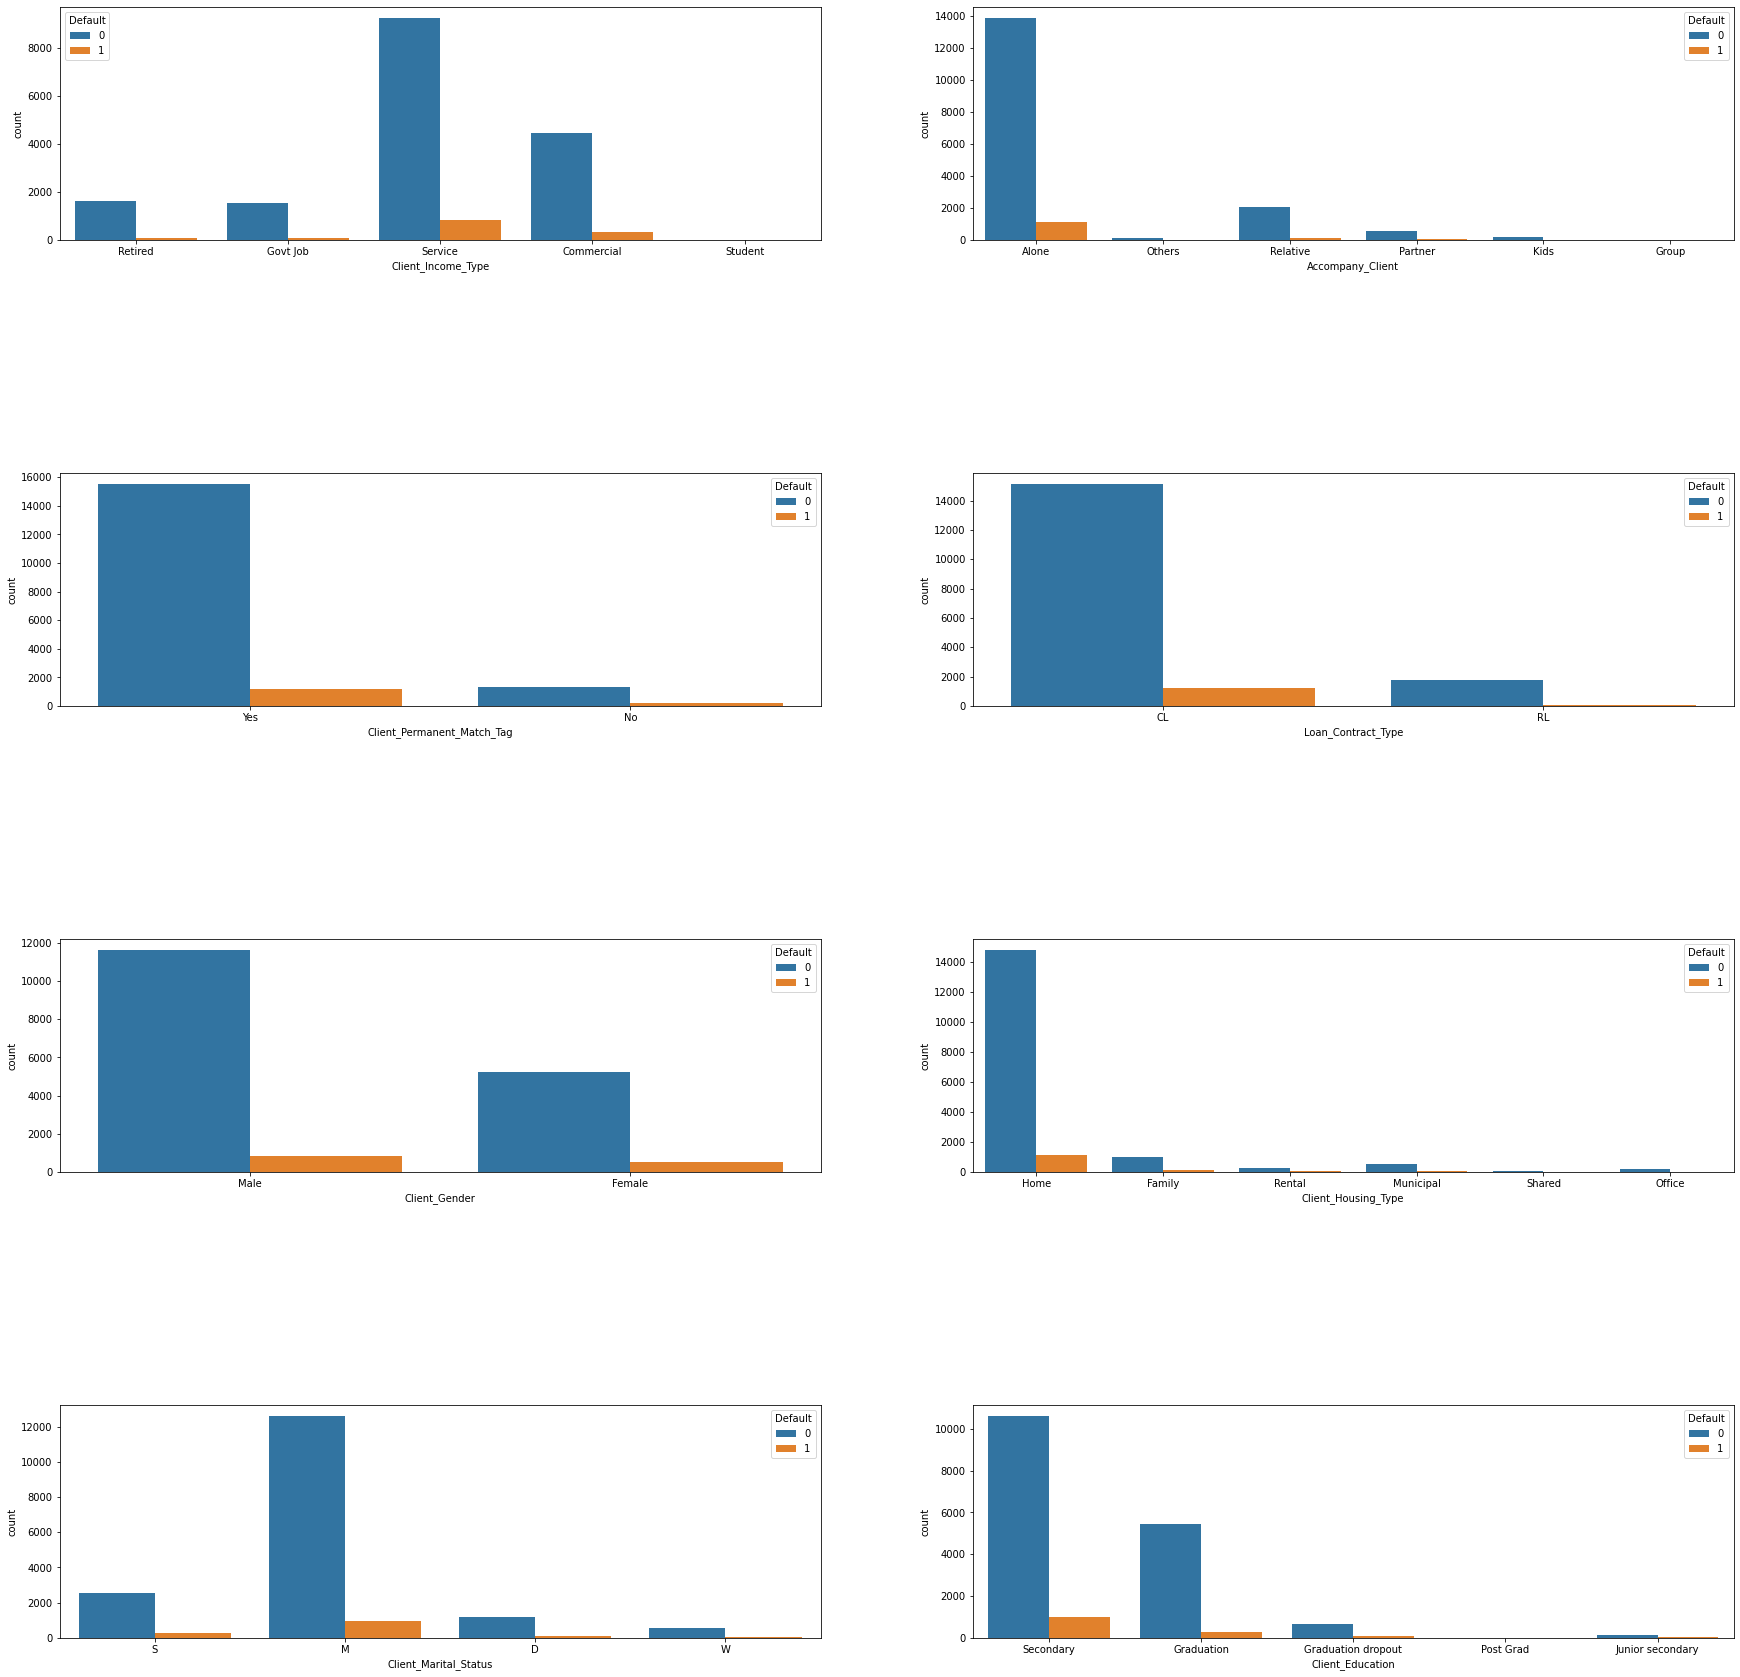

In [114]:
catg_cols = ['Client_Income_Type', 'Accompany_Client', 'Client_Permanent_Match_Tag', 'Loan_Contract_Type', 'Client_Gender', 'Client_Housing_Type', 'Client_Marital_Status', 'Client_Education']

figure, axes = plt.subplots(4, 2, figsize = (30, 30))

for index, catg_col in enumerate(catg_cols):

    row, col = index // 2, index % 2

    sns.countplot( x = catg_col, data = df1, hue = 'Default', ax=axes[row, col] ) 


plt.subplots_adjust(hspace = 1 )

In [110]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transform = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8, 9, 12, 13, 14])], remainder='passthrough')
X = np.array(transform.fit_transform(df1))

In [122]:
Y = np.array(df1.Default)

In [124]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X,Y)

ValueError: could not convert string to float: 'Secondary'

In [ ]:
print("Accuracy on training set:", linear_model.score(X,Y))